In [1]:
import json
import numpy as np
import pandas as pd

# Nạp file vào dataframe

In [2]:
df = None
lines_with_errors = []

with open('data/university_diemchuan_total', encoding='utf8') as f:
    # The first line doesn't have any data, so we skip it to let
    # other lines define the dataframe columns
    first_line = f.readline()
    
    for line in f.readlines():
        try:
            json_data = json.loads(line.strip())
        except:
            lines_with_errors.append(line)
        
        # Create a subtable for each line
        grades = json_data['diemchuan_datas']
        university_meta = json_data['university_meta']
        
        table = pd.read_json(json.dumps(grades), orient='records')
        table['university_code'] = university_meta['university_code']
        table['university_name'] = university_meta['university_name']
        table['url'] = university_meta['url']
        
        # Append to the final dataframe
        df = table if df is None else pd.concat([df, table])

In [3]:
len(lines_with_errors)

2

# Tiền xử lý

In [4]:
df['point'] = df['point'].replace(to_replace={'---': np.nan}).astype(float)

In [5]:
df = df.sort_values('year')

In [6]:
df = df.reset_index(drop=True)

# Xem sơ qua data

In [7]:
df.head()

,major_code,major_name,subject_group,point,note,year,university_code,university_name,url
0,7620301,Nuôi trồng thủy sản,B,14.0,,2014.0,HDT,Đại Học Hồng Đức,https://diemthi.tuyensinh247.com/diem-chuan/da...
1,7480101,Khoa học máy tính,A,26.5,(đã nhân hệ số 2 môn Toán),2014.0,QSC,Đại Học Công Nghệ Thông Tin – Đại Học Quốc Gia...,https://diemthi.tuyensinh247.com/diem-chuan/da...
2,7620301,Nuôi trồng thủy sản,A,14.5,,2014.0,DHL,Đại Học Nông Lâm – Đại Học Huế,https://diemthi.tuyensinh247.com/diem-chuan/da...
3,7850103,Quản lý đất đai,A,14.5,,2014.0,DHL,Đại Học Nông Lâm – Đại Học Huế,https://diemthi.tuyensinh247.com/diem-chuan/da...
4,7620105,Chăn nuôi,A,16.0,,2014.0,DHL,Đại Học Nông Lâm – Đại Học Huế,https://diemthi.tuyensinh247.com/diem-chuan/da...


In [8]:
df.shape

(68793, 9)

In [9]:
df.dtypes

major_code          object
major_name          object
subject_group       object
point              float64
note                object
year               float64
university_code     object
university_name     object
url                 object
dtype: object

<AxesSubplot:>

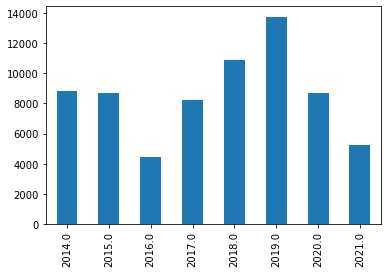

In [10]:
df['year'].value_counts().sort_index().plot(kind='bar')

# Lưu file

In [11]:
df.to_csv('data/admission_score.csv')